# <center>Boğaziçi University</center>
## <center>IE582 Homework I</center> 
<center>Selahattin Seha CIRIT - 2023705006</center>

# Brief Summary about the homework

In this homework, Borsa Istanbul stock prices dataset was analyzed. The dataset includes randomly selected stocks with close prices over given period. Thanks to the required steps in homework, detailed data analysis that is from descriptive analysis to dimensionality reduction via PCA method was occurred. 

In [1]:
# Required libraries imported

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as PCA_Function
from scipy.stats import kurtosis, skew, trim_mean

In [2]:
# Data read, if you would like to run the script in your local environment, please adjust DATA_LOCAL_PATH for your environment. 
# Along the homework, only long format data was used to do proper data analysis. 

DATA_LOCAL_PATH = "/home/ssc/Desktop/BOUN/Courses/Fall-23/IE 582/fall-23-ssehacirit/HW1/"

data = pd.read_csv(DATA_LOCAL_PATH + "all_ticks_long.csv.gz")

# timestamp manipulation to transform given timestamp format into pandas datetime format which is more useful than another.
data["timestamp"] = pd.to_datetime(data.timestamp).dt.tz_convert(None)
data

short_name           timestamp    price
0            AEFES 2012-09-17 06:45:00  22.3978
1            AEFES 2012-09-17 07:00:00  22.3978
2            AEFES 2012-09-17 07:15:00  22.3978
3            AEFES 2012-09-17 07:30:00  22.3978
4            AEFES 2012-09-17 07:45:00  22.5649
...            ...                 ...      ...
2848025      ZOREN 2019-07-22 14:00:00   1.1800
2848026      ZOREN 2019-07-22 14:15:00   1.1800
2848027      ZOREN 2019-07-22 14:30:00   1.1800
2848028      ZOREN 2019-07-22 14:45:00   1.1800
2848029      ZOREN 2019-07-22 15:00:00   1.1700

[2848030 rows x 3 columns]

#### Task I - Descriptive Analysis

The dataset was analyzed in terms of some summary stats features like min, max, median, quartiles, std etc. Main idea in this step is feeling the structure of the dataset, understanding distribution of given variables and calculating measures of central tendency, dispersion etc.

In [3]:
# Because the dataset is long format, with the groupby function of pandas, calculations were easily made. 
# Required information were provided below.  

data.groupby("short_name").apply(lambda x: pd.Series({
    "N": x["price"].count(),
    "minDate": x["timestamp"].min(),
    "maxDate": x["timestamp"].max(),
    "min_price": x["price"].min(),
    "q25_price": x["price"].quantile(0.25),
    "q50_price": x["price"].quantile(0.5), # also known as 'median',
    "q75_price": x["price"].quantile(0.75),
    "max_price": x["price"].max(),
    "mean_price": x["price"].mean(),
    "std_price": x["price"].std(),
    "skew_price": skew(x["price"], nan_policy="omit"),
    "kurtosis_price": kurtosis(x["price"], nan_policy="omit"),
    "trim-mean_price": trim_mean(x["price"], proportiontocut=0.05),
    "mad_price": abs(x["price"] - x["price"].mean()).mean(),
    "range_price": x["price"].max() - x["price"].min()
}))

N             minDate             maxDate  min_price  \
short_name                                                             
AEFES       48131 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
AKBNK       49209 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
AKSA        48594 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
AKSEN       48171 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0000   
ALARK       48335 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
ALBRK       46862 2012-09-17 06:45:00 2019-07-23 15:00:00     1.0255   
ANACM       48165 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
ARCLK       49045 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
ASELS       48803 2012-09-17 06:45:00 2019-07-23 07:00:00     0.0001   
ASUZU       48433 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
AYGAZ       48119 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
BAGFS       48650 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
BANVT       47951 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0000   
BRISA       48937 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
CCOLA       48749 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
CEMAS       46394 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0000   
ECILC       48492 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
EREGL       49173 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
FROTO       48995 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
GARAN       49308 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
GOODY       48961 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
GUBRF       49057 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
HALKB       49071 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
ICBCT       44336 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0000   
ISCTR       49221 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
ISDMR       12227 2016-03-28 06:30:00 2019-07-23 15:00:00     1.0181   
ISFIN       42877 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
ISYAT       43184 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
KAREL       46032 2012-09-17 06:45:00 2019-07-22 15:00:00     0.0001   
KARSN       48527 2012-09-17 06:45:00 2019-07-22 15:00:00     0.0001   
KCHOL       49093 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
KRDMB       47532 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
KRDMD       49161 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
MGROS       48903 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
OTKAR       48785 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
PARSN       45325 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0000   
PETKM       49184 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
PGSUS       45221 2013-04-26 06:30:00 2019-07-23 15:00:00     0.0000   
PRKME       48466 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
SAHOL       49095 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
SASA        47633 2012-09-17 06:45:00 2019-07-22 15:00:00     0.0001   
SISE        49090 2012-09-17 06:45:00 2019-07-22 15:00:00     0.0001   
SKBNK       47270 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
SODA        48276 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
TCELL       49143 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
THYAO       49282 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
TKFEN       48930 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
TOASO       48946 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
TRKCM       48886 2012-09-17 06:45:00 2019-07-22 15:00:00     0.0001   
TSKB        48384 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
TTKOM       49077 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
TUKAS       45929 2012-09-17 06:45:00 2019-07-23 15:00:00     0.6500   
TUPRS       49143 2012-09-17 06:45:00 2019-07-23 15:00:00     0.0001   
USAK        47659 2012-09-17 06:45:00 2019-07-23 15:00:0

Almost all of summary stats provide insights about distributions of given stocks. Mean price, standard deviation of price, skewness, kurtosis, quartiles are helpful to understand better how the stock distributes. Outliers also could be seen with these information. However, rather than value-based analysis, i prefer plot-based analysis which gives overall perspective about stocks. Histograms and box-plots could be used to get insights about stocks.  

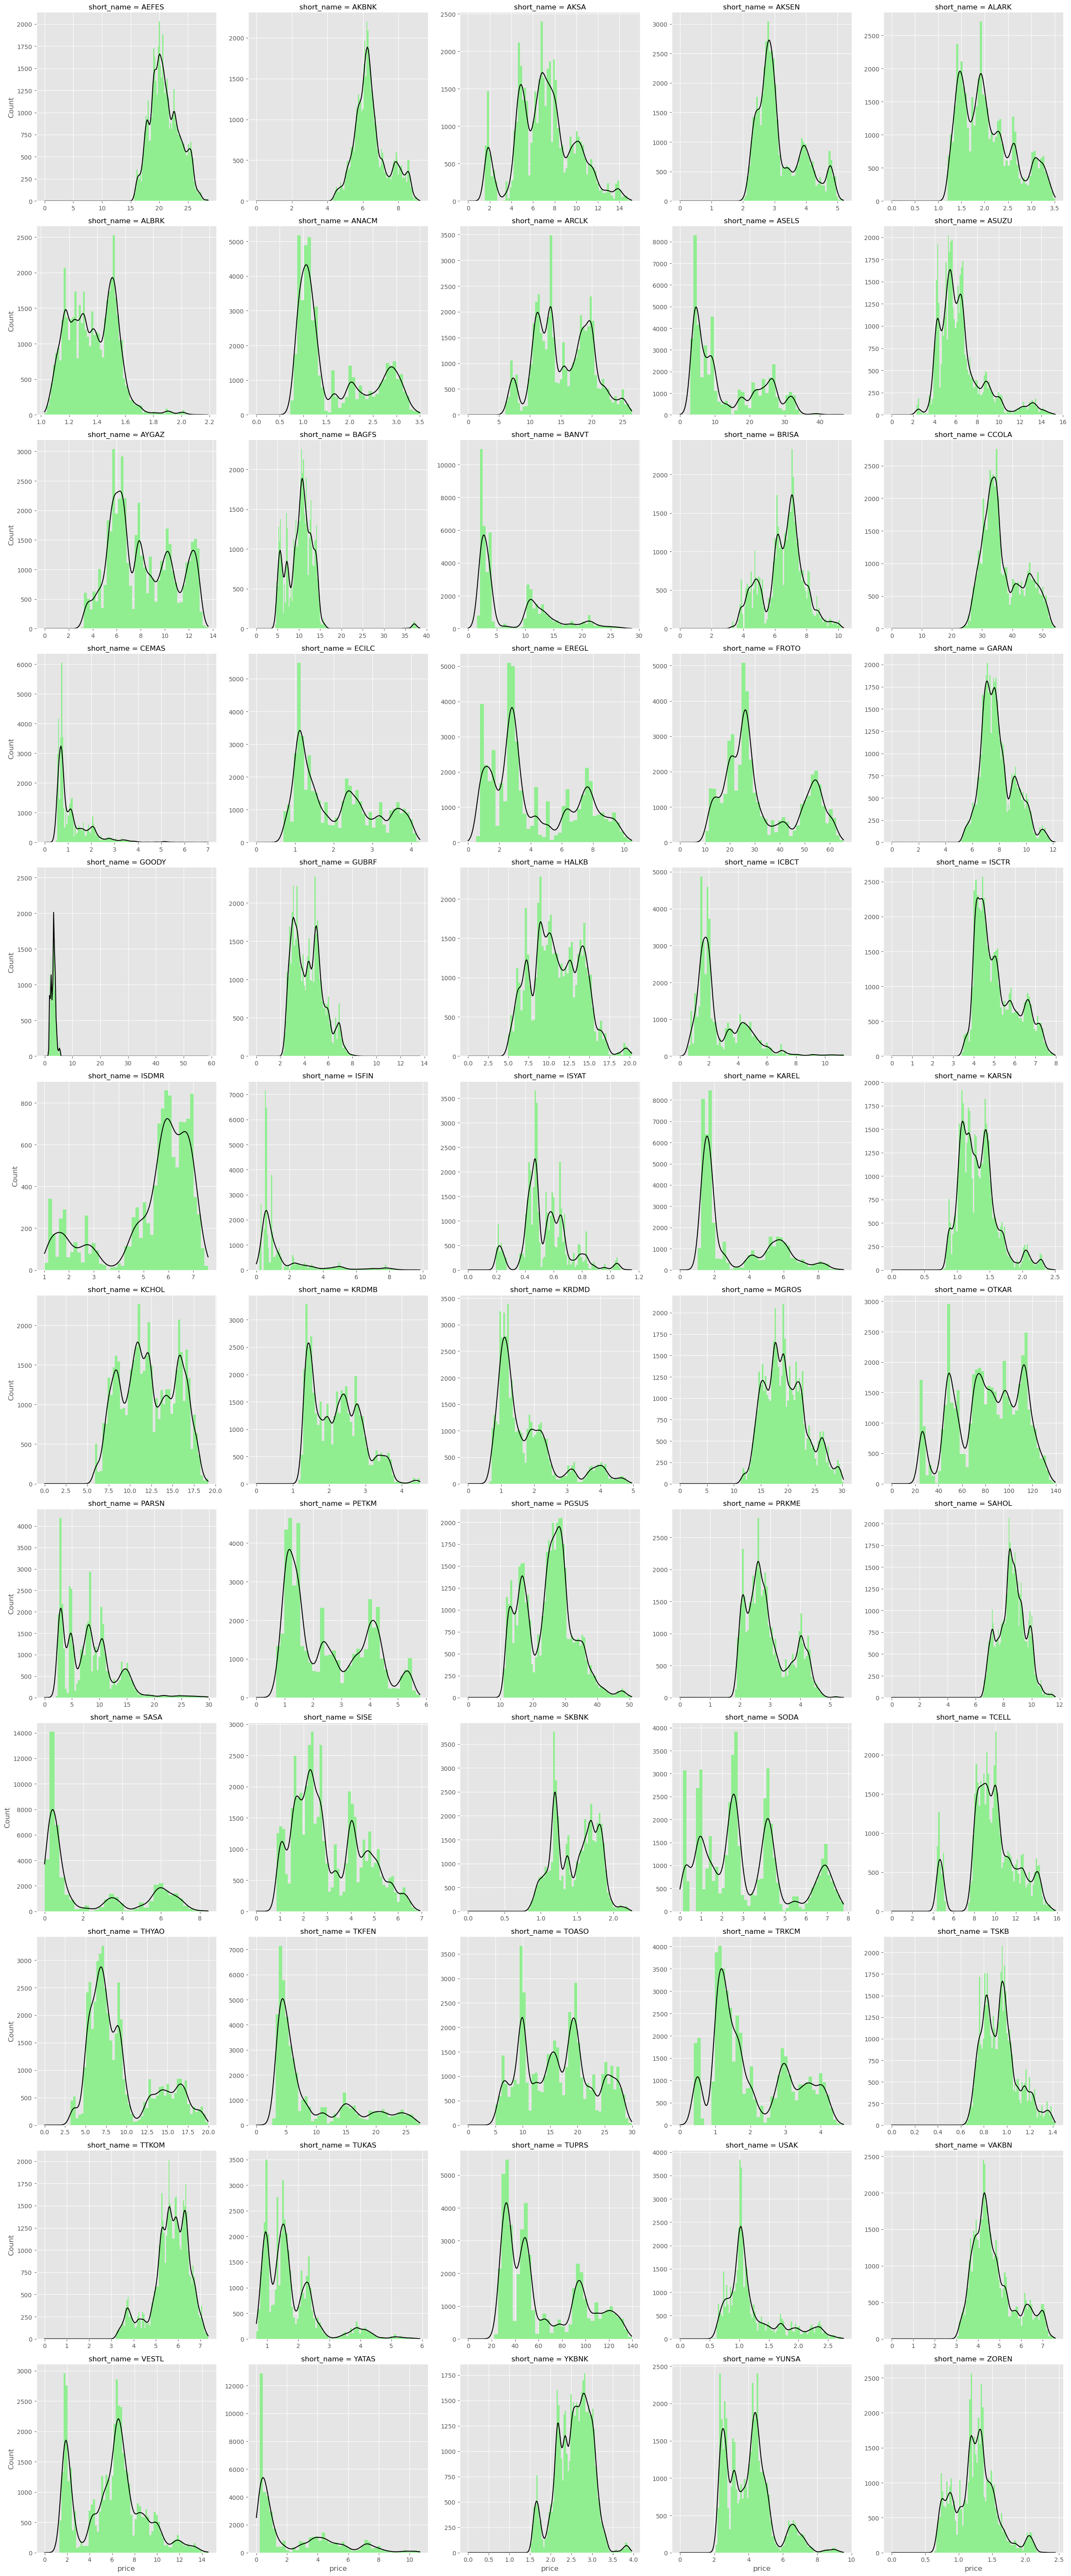

In [4]:
# Stock-based Histogram and its kernel density estimations

g = sns.displot(
    data=data, x="price", col="short_name", 
    col_wrap=5, kde=True, common_bins=False,
    facet_kws={'sharex': False, 'sharey': False},
    facecolor="lightgreen", color="black"
    )

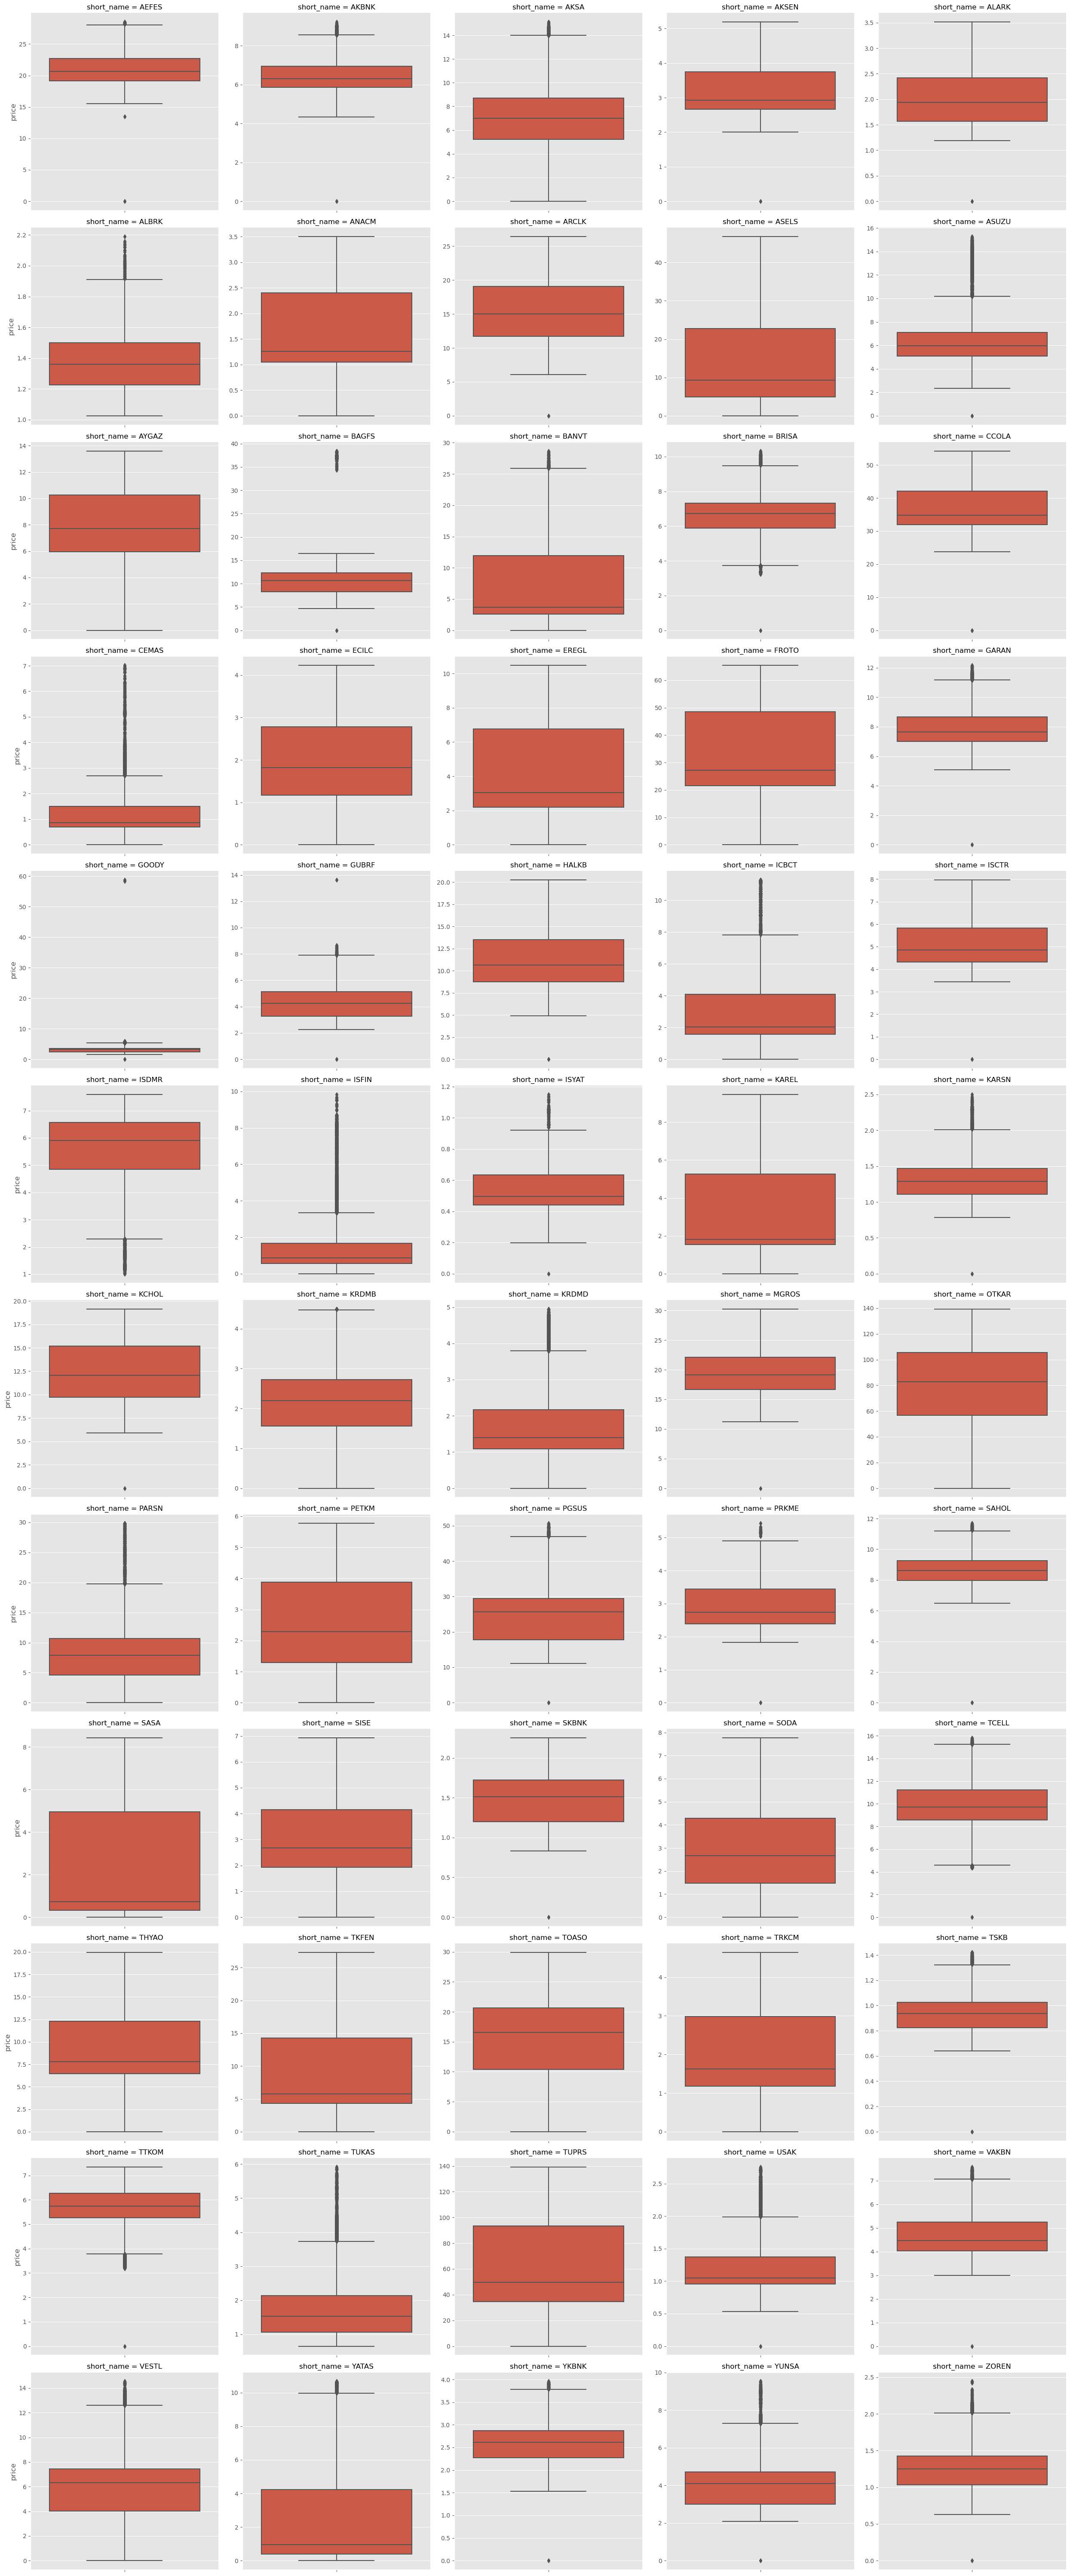

In [5]:
sns.catplot(
    data=data, y="price",
    col="short_name", kind='box', col_wrap=5, sharey=False
)

From histogram view, while some of stocks looks like leftly skewed or vice versa, it is hard to say anything about others. But in general, multimodal distribution is common among the stock prices

Moreover, from the boxplot view, Median, quartiles (percentile 25th and 75th), interquartile value and outliers were detected. For example, when i look at 'ZOREN', min value were assumed as (25th percentile - 1.5 * IQR), so smaller values than the min value can be labeled as **outlier**.

In this direction, while some stocks have outliers, other stocks do not include any outlier value.

In [6]:
# long to wide format transformation

data_pivot = data.pivot_table(
    index=["timestamp"], columns="short_name", values="price"
    ).reset_index().rename_axis(None, axis=1)
data_pivot

timestamp    AEFES   AKBNK    AKSA  AKSEN   ALARK   ALBRK  \
0     2012-09-17 06:45:00  22.3978  5.2084  1.7102   3.87  1.4683  1.1356   
1     2012-09-17 07:00:00  22.3978  5.1938  1.7066   3.86  1.4574  1.1275   
2     2012-09-17 07:15:00  22.3978  5.2084  1.7102    NaN  1.4610  1.1356   
3     2012-09-17 07:30:00  22.3978  5.1938  1.7102   3.86  1.4537  1.1275   
4     2012-09-17 07:45:00  22.5649  5.2084  1.7102   3.87  1.4574  1.1356   
...                   ...      ...     ...     ...    ...     ...     ...   
50007 2019-07-23 14:00:00  20.4800  7.7300  9.1400   2.47  3.2300  1.2100   
50008 2019-07-23 14:15:00  20.5000  7.7200  9.1400   2.47  3.2200  1.2100   
50009 2019-07-23 14:30:00  20.5000  7.7400  9.1300   2.46  3.2300  1.2100   
50010 2019-07-23 14:45:00  20.4000  7.7000  9.1400   2.47  3.2400  1.2100   
50011 2019-07-23 15:00:00  20.4600  7.7000  9.1400   2.47  3.2300  1.2000   

        ANACM    ARCLK   ASELS  ...   TTKOM  TUKAS     TUPRS    USAK   VAKBN  \
0      1.0634   6.9909  2.9948  ...  4.2639   0.96   29.8072  1.0382  3.8620   
1      1.0634   6.9259  2.9948  ...  4.2521   0.96   29.7393  1.0382  3.8529   
2      1.0679   6.9909  2.9855  ...  4.2521   0.97   29.6716  1.0463  3.8436   
3      1.0679   6.9584  2.9855  ...  4.2521   0.97   29.7393  1.0382  3.8529   
4      1.0725   6.9909  2.9760  ...  4.2521   0.97   29.8072  1.0382  3.8620   
...       ...      ...     ...  ...     ...    ...       ...     ...     ...   
50007  2.8400  20.3000     NaN  ...  5.6000   4.34  131.6000  1.0500  4.8600   
50008  2.8400  20.3200     NaN  ...  5.5700   4.35  131.5000  1.0500  4.8600   
50009  2.8300  20.3400     NaN  ...  5.5700   4.36  131.5000  1.0500  4.8600   
50010  2.8200  20.3800     NaN  ...  5.5700   4.35  131.3000  1.0400  4.8600   
50011  2.8300  20.3200     NaN  ...  5.5600   4.34  131.8000  1.0500  4.8500   

       VESTL   YATAS   YKBNK   YUNSA   ZOREN  
0       1.90  0.4172  2.5438  2.2619  0.7789  
1       1.90  0.4229  2.5266  2.2462  0.7789  
2       1.91  0.4229  2.5266  2.2566  0.7789  
3       1.91  0.4286  2.5324  2.2619  0.7860  
4       1.90  0.4286  2.5324  2.2619  0.7789  
...      ...     ...     ...     ...     ...  
50007   9.98  5.3500  2.7500  4.2500     NaN  
50008   9.98  5.3400  2.7500  4.2400     NaN  
50009   9.96  5.3400  2.7600  4.2400     NaN  
50010   9.94  5.3400  2.7700  4.2400     NaN  
50011   9.93  5.3300  2.7700  4.2400     NaN  

[50012 rows x 61 columns]

It is known that the dataset also includes NaN observations due to some reasons like public offering dates of stocks. So, stock based sum of nan values were printed below and sorted from higher to lower. ISDMR is the highest nan observations stock. Missing values handling another topic that i have to focus on, but handling missing value is the off-topic for the homework. So, i simply filled these missing values with overall mean of stocks in PCA step by awareing this is completely wrong approach as it could lead to biased comments.

In [7]:
# Number of NaN observations per stocks

data_pivot.isna().sum().sort_values(ascending=False)

ISDMR        37785
ISFIN         7135
ISYAT         6828
ICBCT         5676
PGSUS         4791
             ...  
ISCTR          791
YKBNK          787
THYAO          730
GARAN          704
timestamp        0
Length: 61, dtype: int64

In [8]:
# pair-wise correlation matrix to understanding relationships between stocks

stock_names = [x for x in list(data_pivot) if "timestamp" not in x]
corr_matrix = data_pivot[stock_names].corr()
corr_matrix.head()

AEFES     AKBNK      AKSA     AKSEN     ALARK     ALBRK     ANACM  \
AEFES  1.000000  0.267502 -0.000625  0.528379  0.319894  0.496981  0.117802   
AKBNK  0.267502  1.000000  0.572321  0.548420  0.657648  0.165933  0.439169   
AKSA  -0.000625  0.572321  1.000000  0.280772  0.636207 -0.045111  0.712541   
AKSEN  0.528379  0.548420  0.280772  1.000000  0.470681  0.283348  0.469720   
ALARK  0.319894  0.657648  0.636207  0.470681  1.000000  0.158375  0.736034   

          ARCLK     ASELS     ASUZU  ...     TTKOM     TUKAS     TUPRS  \
AEFES -0.335744  0.032488  0.442354  ...  0.255756 -0.204048 -0.100480   
AKBNK  0.644439  0.583853  0.587298  ...  0.578765  0.315863  0.384826   
AKSA   0.735731  0.844647  0.760313  ...  0.131398  0.561769  0.732025   
AKSEN  0.002287  0.439348  0.594102  ...  0.211780 -0.077261  0.235223   
ALARK  0.464037  0.752573  0.719034  ...  0.080230  0.498251  0.655195   

           USAK     VAKBN     VESTL     YATAS     YKBNK     YUNSA     ZOREN  
AEFES  0.083471  0.397543 -0.150159  0.235401  0.538889  0.475578  0.061791  
AKBNK  0.785438  0.942930  0.484747  0.593489  0.516761  0.083837  0.627474  
AKSA   0.728294  0.512615  0.776674  0.821989 -0.169104  0.394182  0.701427  
AKSEN  0.581016  0.606355  0.136128  0.456702  0.375938  0.451502  0.371093  
ALARK  0.652558  0.653074  0.509264  0.791923  0.161212  0.374540  0.391374  

[5 rows x 60 columns]

<AxesSubplot:>

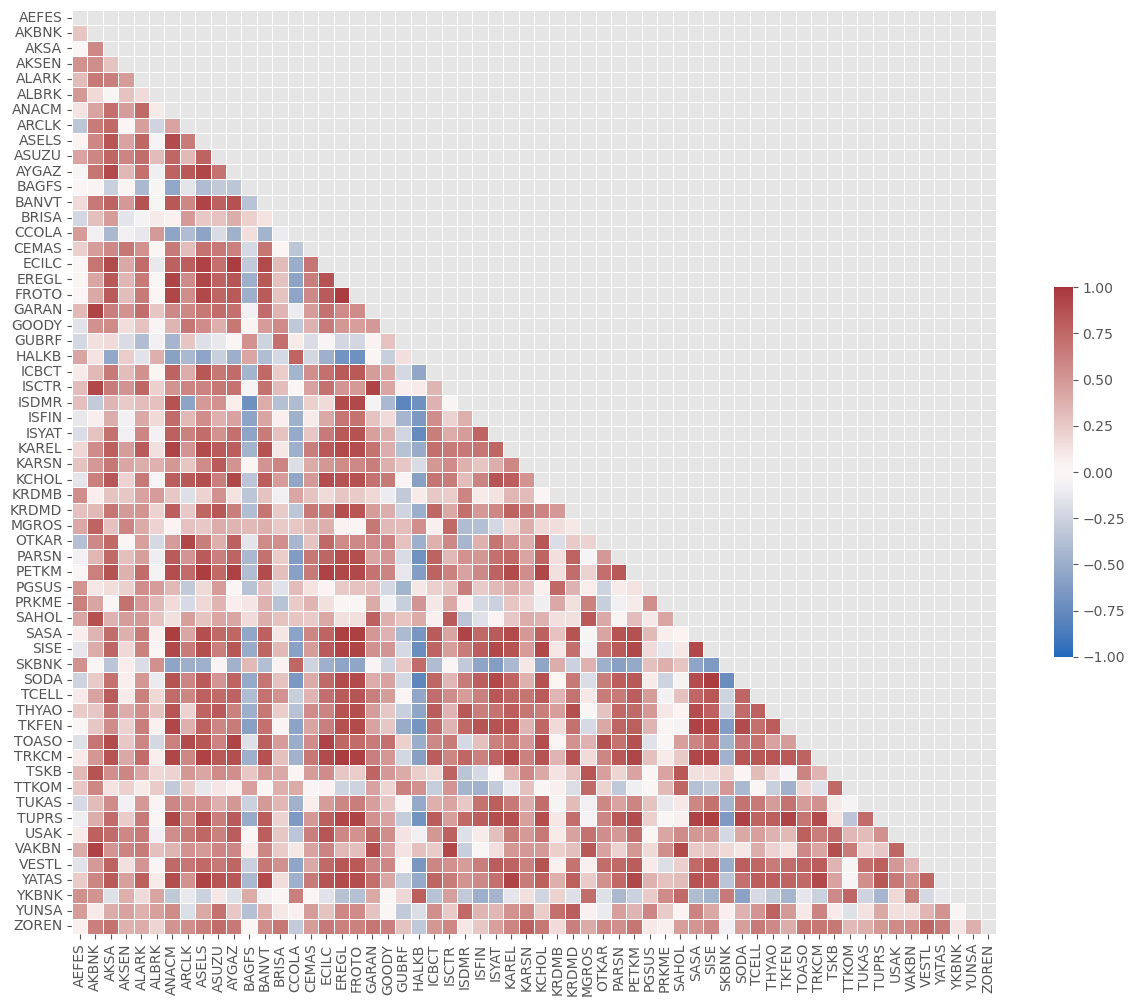

In [9]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .4})

By investigating heatmap plot, i chose three pairs of stocks in terms of having positive, negative and no correlation. In each category, randomly selected pairs are just representation of their category. Selection decision was not made by considering their correlation values, was made by just their cell colors

- SISE & TEKFN which have positive correlation between each other
- TCELL & GUBRF which do not have any correlation between each other and,
- ISDMR & BAGFS which have negative correlation between each other.

#### Task 2 - Moving Window Correlation

Due to interesting pairs of stocks selected from the previous section, i will dive deep with these pairs of stocks in moving window correlation step.

1 Month, 3 Month and 6 Month moving window period were selected to analyse rolling correlation of these pairs of stocks.

In [10]:
PERIOD_SPACE = ["30D", "90D", "180D"]
PAIR1 = ("SISE", "TKFEN")
PAIR2 = ("TCELL", "GUBRF")
PAIR3 = ("ISDMR", "BAGFS")

In [11]:
def calculate_rolling_corrs(
        data: pd.DataFrame, stock_pairs: tuple, period_space: list
        ) -> pd.DataFrame:
        """
        returns a dataframe that includes rolling correlation vals over desired window size
        """
    
        stock1, stock2 = stock_pairs

        rolling_ops_df = data.set_index("timestamp")

        rolling_cors = []
        for prd in period_space:
            temp_rolling_cor = (rolling_ops_df[stock1]
             .rolling(prd)
             .corr(rolling_ops_df[stock2])
             .reset_index(name="Rolling Corr Values")
            )
            temp_rolling_cor["Window Size"] = f"{prd} Rolling Corr" 
            rolling_cors.append(temp_rolling_cor)

        rollings_cors_df = pd.concat(rolling_cors, ignore_index=True)
        rollings_cors_df = rollings_cors_df.pivot_table(
            index="timestamp", columns="Window Size", values="Rolling Corr Values", dropna=False
            ).reset_index().rename_axis(None, axis=1)
        
        return rollings_cors_df

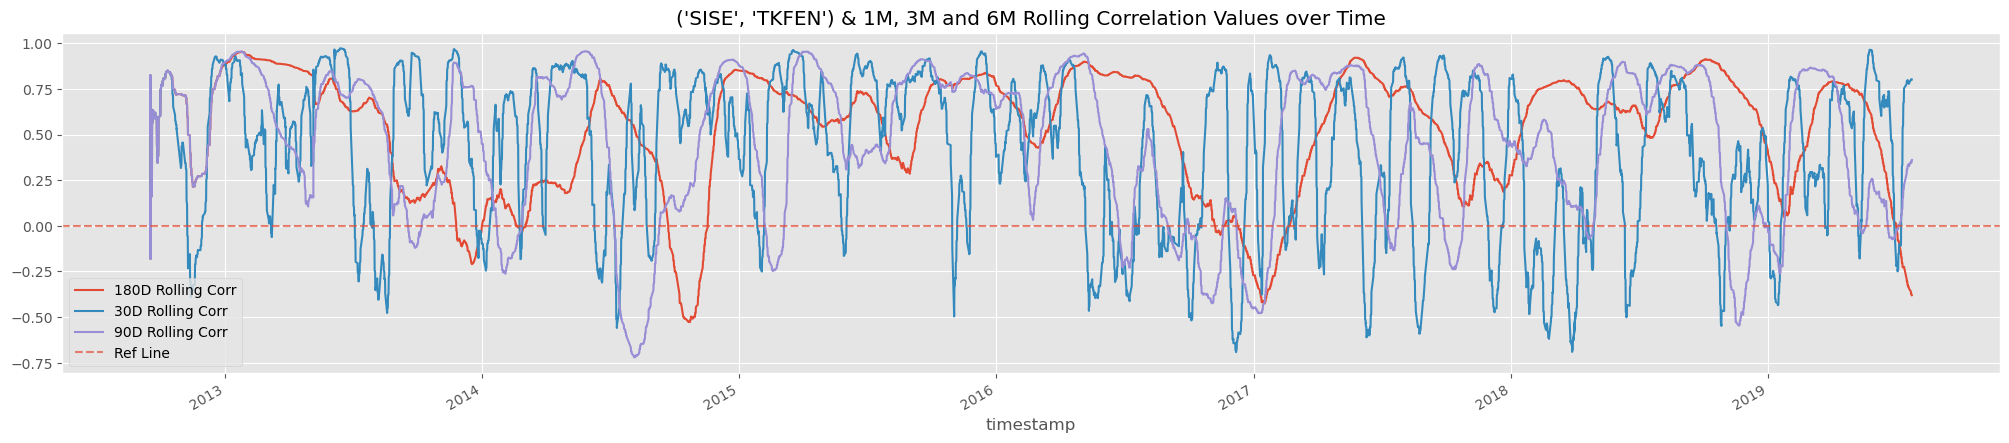

In [12]:
rolling_corrs_pair1 = calculate_rolling_corrs(
    data_pivot, PAIR1, PERIOD_SPACE 
)
ax = rolling_corrs_pair1.plot(x="timestamp", figsize=(25, 5))
ax.axhline(0, label="Ref Line", ls="--", alpha=0.69)
ax.set_title(f"{PAIR1} & 1M, 3M and 6M Rolling Correlation Values over Time")
ax.legend()
plt.show()

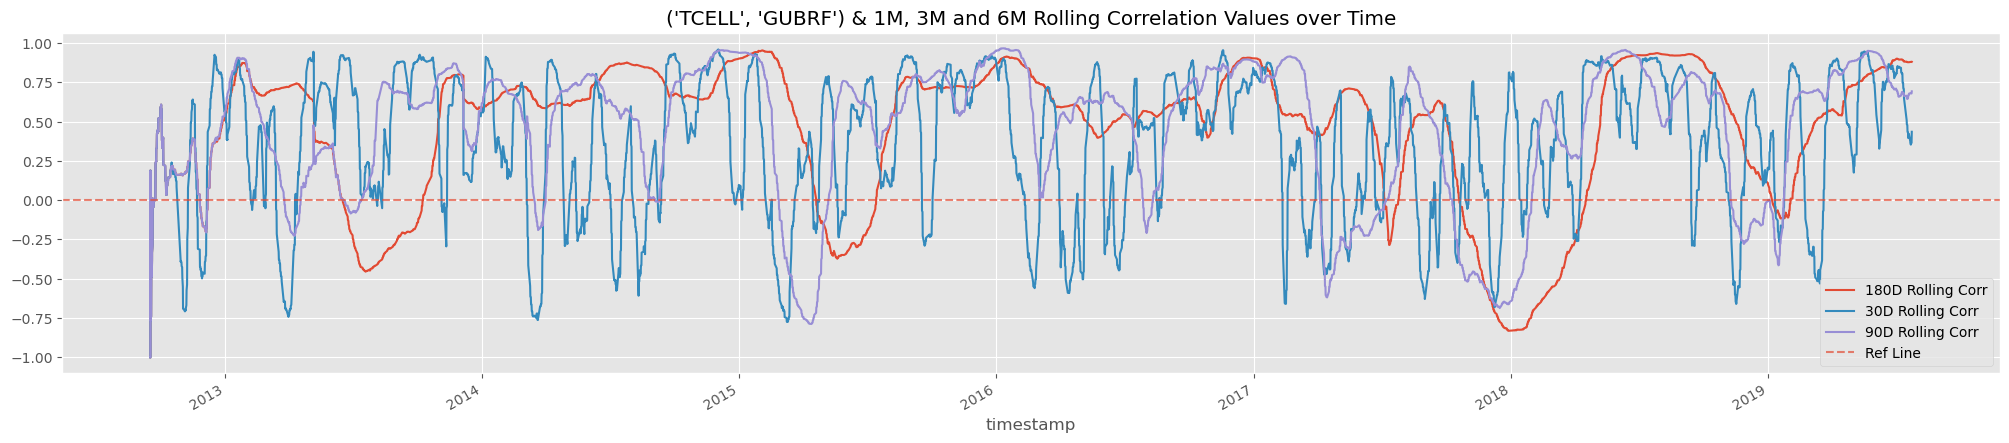

In [13]:
rolling_corrs_pair2 = calculate_rolling_corrs(
    data_pivot, PAIR2, PERIOD_SPACE 
)
ax = rolling_corrs_pair2.plot(x="timestamp", figsize=(25, 5))
ax.axhline(0, label="Ref Line", ls="--", alpha=0.69)
ax.set_title(f"{PAIR2} & 1M, 3M and 6M Rolling Correlation Values over Time")
ax.legend()
plt.show()

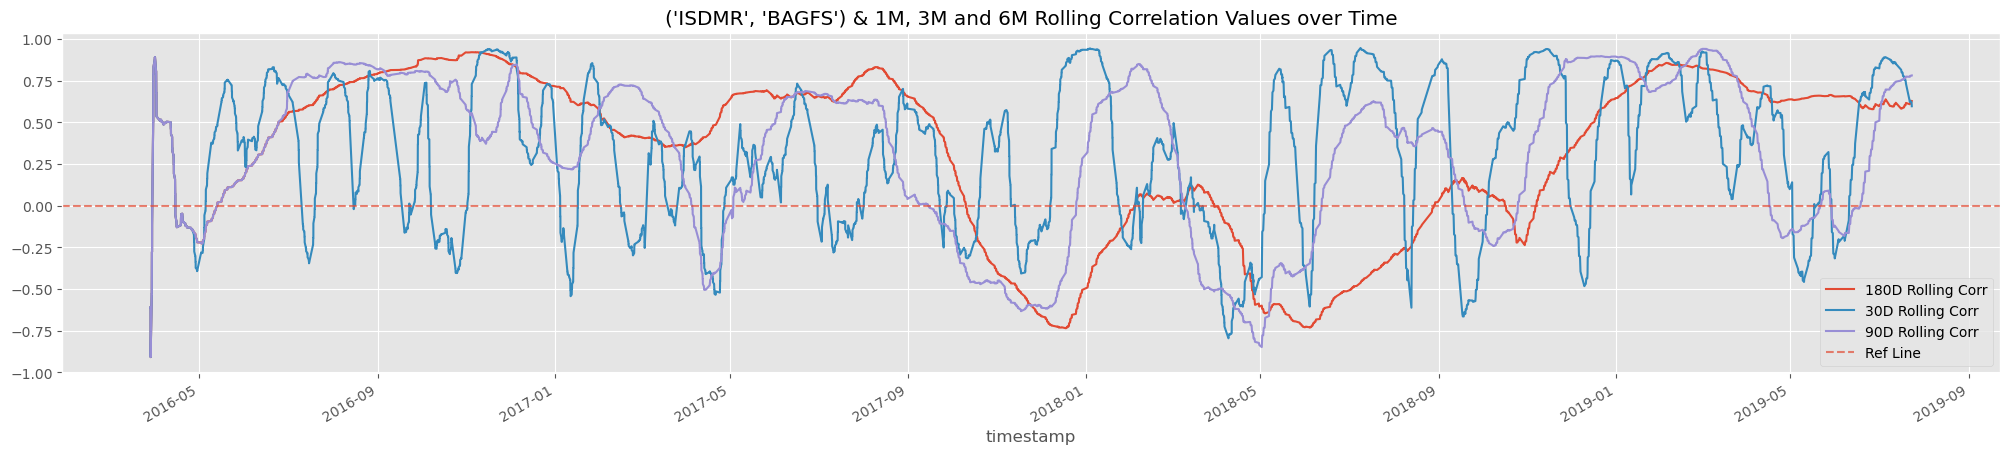

In [14]:
rolling_corrs_pair3 = calculate_rolling_corrs(
    data_pivot, PAIR3, PERIOD_SPACE 
)
ax = rolling_corrs_pair3.plot(x="timestamp", figsize=(25, 5))
ax.axhline(0, label="Ref Line", ls="--", alpha=0.69)
ax.set_title(f"{PAIR3} & 1M, 3M and 6M Rolling Correlation Values over Time")
ax.legend()
plt.show()

It's time to evaluate the these 3 pairs of stocks with respect to plot outputs

- **(SISE, TKFEN)**

- **(TCELL, GUBRF)**

- **(ISDMR, BAGFS)**

All of mentioned pairs have common trends in 1M, 3M and 6M rolling correlation lines. All of them are sometimes goes up and sometimes goes down. Certainly, their characteristics differs from each other. In short, seasonal patterns can be seen from the plots. This may originated from market manipulation, news about the company sectors or some bureucratic talks. These patterns will be validated in Google Trends analysis.

#### Task 3 - PCA Application

Dimensionality reduction method was applied via Principal Component Analysis (PCA). Before the application of PCA, standard scaling of features are essential to fair model evaluation. However, imputing nan observations is the first step for this task because PCA does not work with nan observations.

In [15]:
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(data_pivot[stock_names])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

scaled_data

array([[ 0.57857848, -1.34926492, -2.02795754, ..., -0.05370799,
        -1.41440415, -1.52566733],
       [ 0.57857848, -1.3648411 , -2.02930519, ..., -0.09471605,
        -1.42662012, -1.52566733],
       [ 0.57857848, -1.34926492, -2.02795754, ..., -0.09471605,
        -1.41852801, -1.52566733],
       ...,
       [-0.19710197,  1.3516016 ,  0.74963037, ...,  0.46175389,
         0.12473097,  0.        ],
       [-0.23797458,  1.30892714,  0.75337385, ...,  0.48559579,
         0.12473097,  0.        ],
       [-0.21345102,  1.30892714,  0.75337385, ...,  0.48559579,
         0.12473097,  0.        ]])

In [16]:
pca_model = PCA_Function(random_state=3169)
pca_model.fit(scaled_data)

PCA(random_state=3169)

In [17]:
pca_summary = pd.DataFrame(
    np.vstack(
        [pca_model.get_feature_names_out(), 
         pca_model.explained_variance_ratio_,
         np.cumsum(pca_model.explained_variance_ratio_)]
         )).T
pca_summary.columns = ["PCA Components", "Proportion of Variance", "Cumulative Proportion"]
pca_summary[:20]

PCA Components Proportion of Variance Cumulative Proportion
0            pca0               0.488094              0.488094
1            pca1               0.170283              0.658377
2            pca2               0.107268              0.765646
3            pca3               0.049891              0.815537
4            pca4               0.038081              0.853618
5            pca5               0.021406              0.875023
6            pca6               0.015324              0.890347
7            pca7               0.013280              0.903627
8            pca8               0.010235              0.913862
9            pca9               0.008878              0.922740
10          pca10               0.008343              0.931083
11          pca11               0.007107              0.938190
12          pca12               0.006225              0.944415
13          pca13               0.005945              0.950360
14          pca14               0.004796              0.955156
15          pca15               0.004549              0.959705
16          pca16               0.003477              0.963182
17          pca17               0.003088              0.966270
18          pca18               0.002632              0.968903
19          pca19               0.002611              0.971514

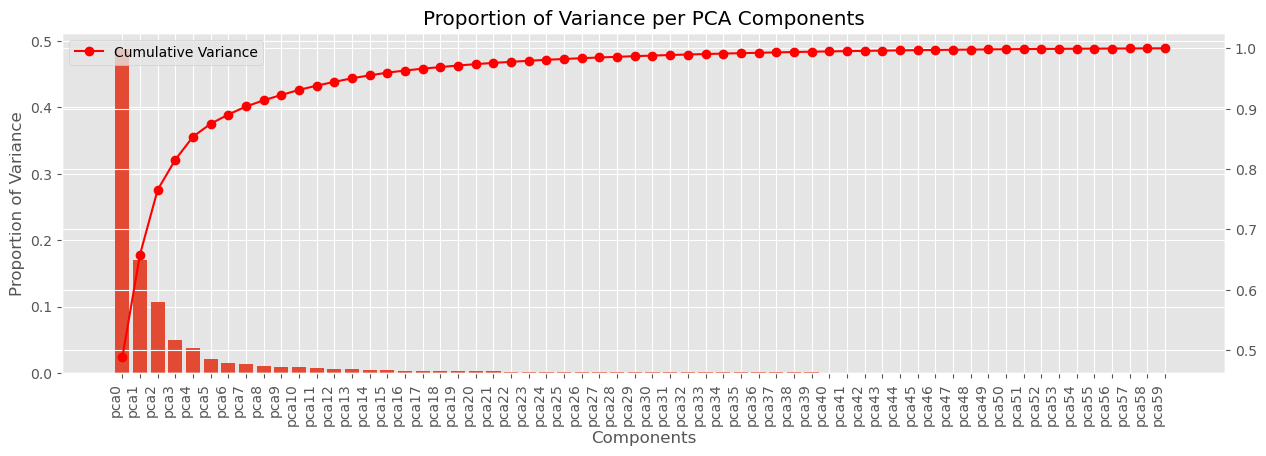

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x=pca_summary["PCA Components"], height=pca_summary["Proportion of Variance"])
ax.set_ylabel("Proportion of Variance")
ax.set_xlabel("Components")
ax.set_title("Proportion of Variance per PCA Components")
ax2 = ax.twinx()
ax2.plot(pca_summary["PCA Components"], pca_summary["Cumulative Proportion"], label="Cumulative Variance", color="red", marker="o")
ax2.legend()
fig.autofmt_xdate(rotation=90)

In [42]:
col_names = [f"pca{x}" for x in range(0, 60)]
pca_loadings = pd.DataFrame(pca_model.components_, columns=col_names)
pca_loadings.insert(0, "Stocks", list(data_pivot[stock_names]))
pca_loadings.set_index("Stocks")
pca_loadings.head()

Stocks      pca0      pca1      pca2      pca3      pca4      pca5  \
0  AEFES -0.010619 -0.115330 -0.162991 -0.074086 -0.139545 -0.008576   
1  AKBNK -0.164429 -0.212004 -0.033005 -0.159788 -0.081720 -0.112583   
2   AKSA -0.261382  0.073484  0.068234 -0.147875 -0.106180 -0.203374   
3  AKSEN  0.014416 -0.094138  0.076323 -0.196707 -0.158188  0.248636   
4  ALARK  0.015394 -0.105984  0.066446  0.236019 -0.223156 -0.122610   

       pca6      pca7      pca8  ...     pca50     pca51     pca52     pca53  \
0 -0.168831 -0.124655 -0.176649  ...  0.011291 -0.115707 -0.169414 -0.130355   
1  0.058363 -0.032705  0.003778  ... -0.268609  0.065278  0.096402 -0.142497   
2 -0.094810  0.251670  0.005959  ...  0.110387  0.057695 -0.011123  0.079051   
3 -0.086114 -0.038360 -0.090251  ...  0.114039  0.104382 -0.033534 -0.177370   
4 -0.011328 -0.123666  0.063168  ... -0.066522 -0.320755 -0.067071  0.091815   

      pca54     pca55     pca56     pca57     pca58     pca59  
0 -0.097293 -0.157651 -0.168918  0.037678 -0.087511 -0.131610  
1 -0.249343  0.035116 -0.017233 -0.279360 -0.000860 -0.097437  
2  0.022534  0.082714 -0.071226 -0.055424 -0.267015  0.069573  
3 -0.075411  0.135683 -0.045575  0.010490  0.188490  0.207352  
4 -0.102075 -0.027652  0.004609 -0.123473  0.161817  0.143059  

[5 rows x 61 columns]

<AxesSubplot:ylabel='Stocks'>

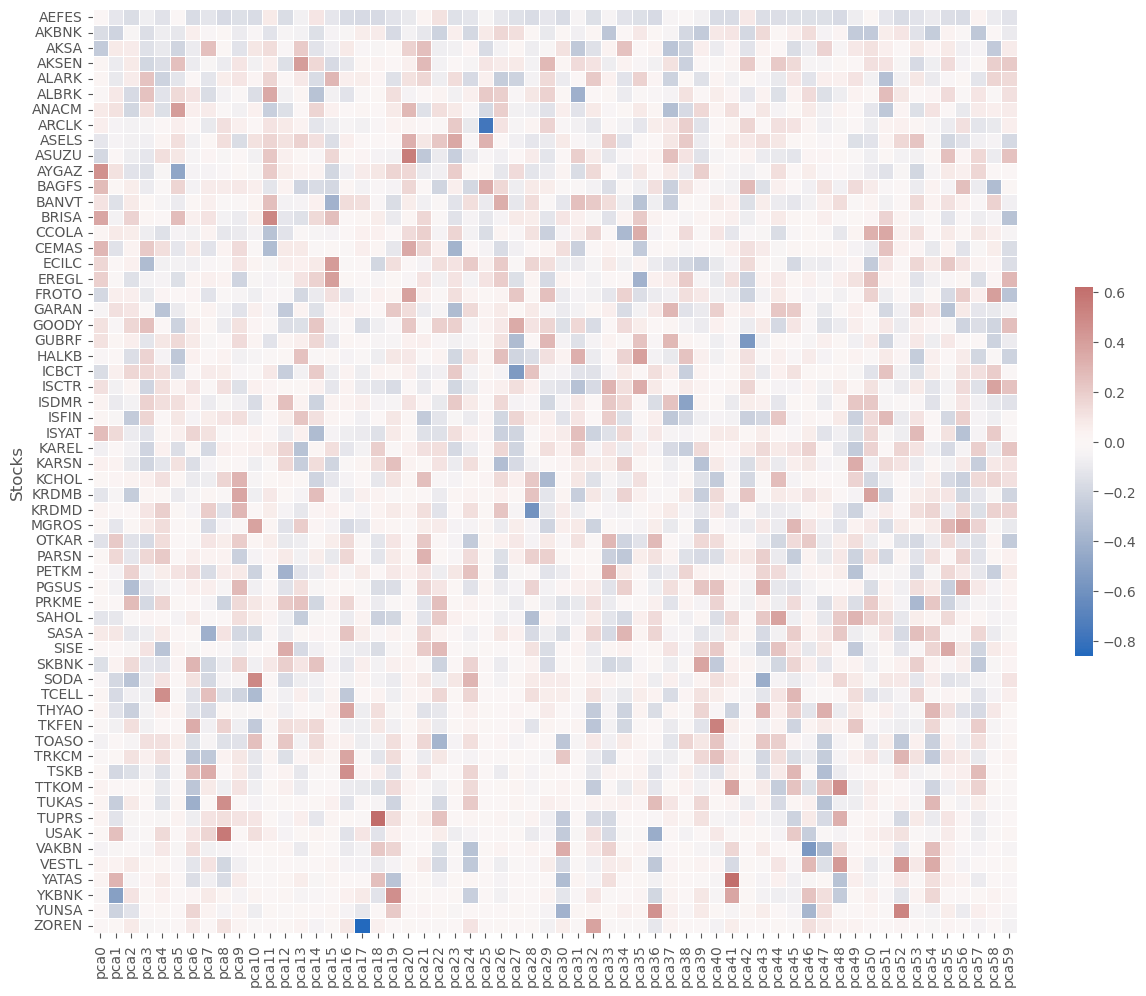

In [52]:
# Factor loadings heatmap

pca_loadings_corr_matrix = pca_loadings.set_index("Stocks")
mask_pca = np.triu(np.ones_like(pca_loadings_corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(pca_loadings_corr_matrix, cmap=cmap, vmax=pca_loadings_corr_matrix.max().max(), vmin=pca_loadings_corr_matrix.min().min(), center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .4})

If I have to discuss briefly of the PCA outputs, Proportion of Variance (explained variance) plot provides an intuition about which components represents data variability. So, First 9 components of PCA represents nearly 90% of dataset. Also, factor loadings heatmap gives information about stock correlation per components. For example, in component 0, AYGAZ, BAGFS, BRISA, CEMAS, ISYAT have higher correlation than other stocks. It also means that these type of stocks contributes more than others in selected PCA component. With the domain knowledge such as sector of these companies or strategic partnerships among these stocks would describe more efficiently in component based correlations. Components could capture these spesific information.

#### Task 4 - Google Trends Analysis

Google Trends insights were used to validate personal observations from the applied analysis above.

In [20]:
def get_gtrend_rolling_correlation(pair):
    """processed google trends raw data for calculating 6-month rolling correlation"""
    stock1, stock2 = pair
    filename = "_".join(list(pair))
    data = pd.read_csv(DATA_LOCAL_PATH + f"multiTimeline_{filename}.csv").reset_index().iloc[1:, :]
    data.columns = ["date", f"{stock1}_Popularity", f"{stock2}_Popularity"]
    data["date"] = pd.to_datetime(data.date)
    data.set_index("date", inplace=True)
    gtrend_rolling_corr = data[f"{stock1}_Popularity"].rolling(6).corr(data[f"{stock2}_Popularity"]).reset_index(name="gtrend_val")
    
    return gtrend_rolling_corr

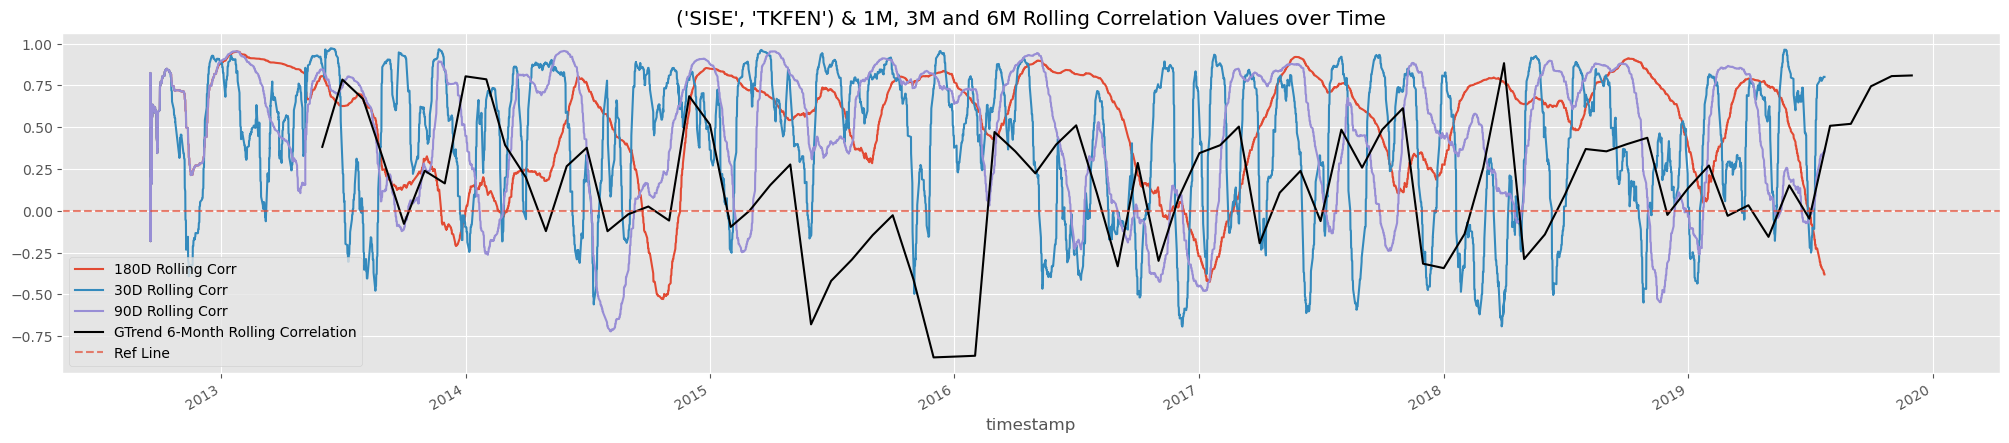

In [21]:
gtrend_rolling_corr = get_gtrend_rolling_correlation(PAIR1)

rolling_corrs_pair1 = calculate_rolling_corrs(
    data_pivot, PAIR1, PERIOD_SPACE 
)
ax = rolling_corrs_pair1.plot(x="timestamp", figsize=(25, 5))
ax.plot(gtrend_rolling_corr.date, gtrend_rolling_corr.gtrend_val, color="black", label="GTrend 6-Month Rolling Correlation")
ax.axhline(0, label="Ref Line", ls="--", alpha=0.69)
ax.set_title(f"{PAIR1} & 1M, 3M and 6M Rolling Correlation Values over Time")
ax.legend()
plt.show()

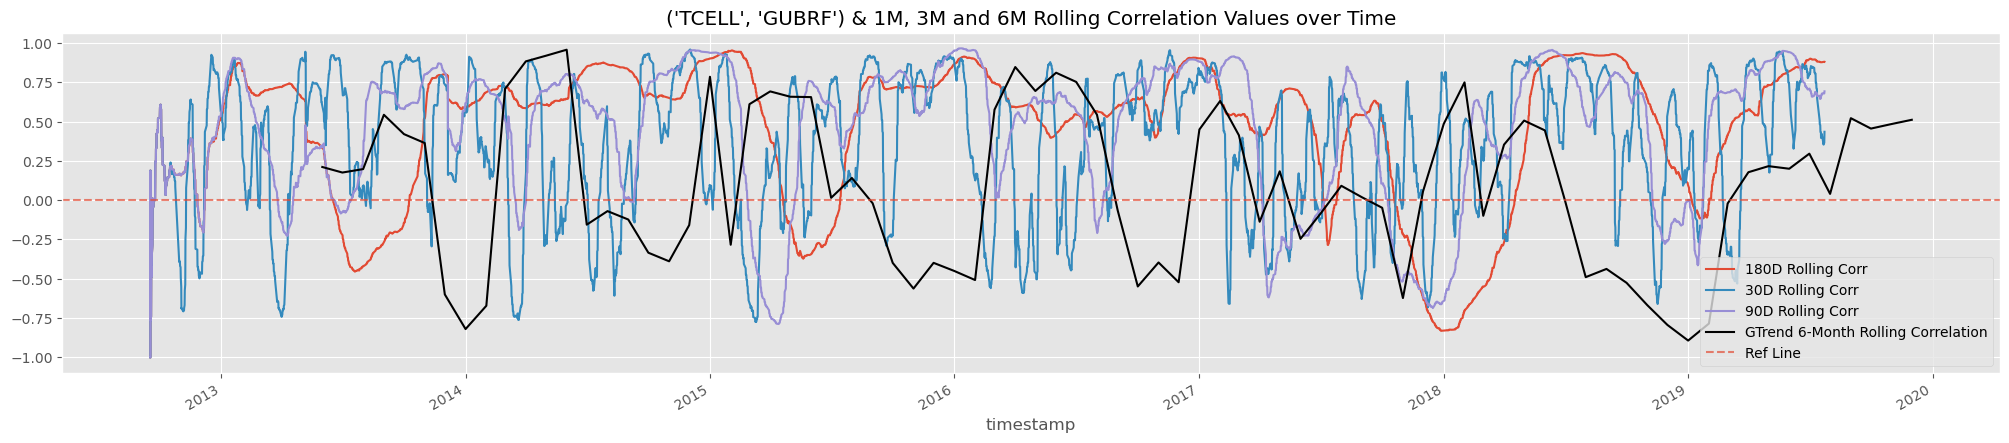

In [22]:
gtrend_rolling_corr = get_gtrend_rolling_correlation(PAIR2)

rolling_corrs_pair2 = calculate_rolling_corrs(
    data_pivot, PAIR2, PERIOD_SPACE 
)
ax = rolling_corrs_pair2.plot(x="timestamp", figsize=(25, 5))
ax.plot(gtrend_rolling_corr.date, gtrend_rolling_corr.gtrend_val, color="black", label="GTrend 6-Month Rolling Correlation")
ax.axhline(0, label="Ref Line", ls="--", alpha=0.69)
ax.set_title(f"{PAIR2} & 1M, 3M and 6M Rolling Correlation Values over Time")
ax.legend()
plt.show()

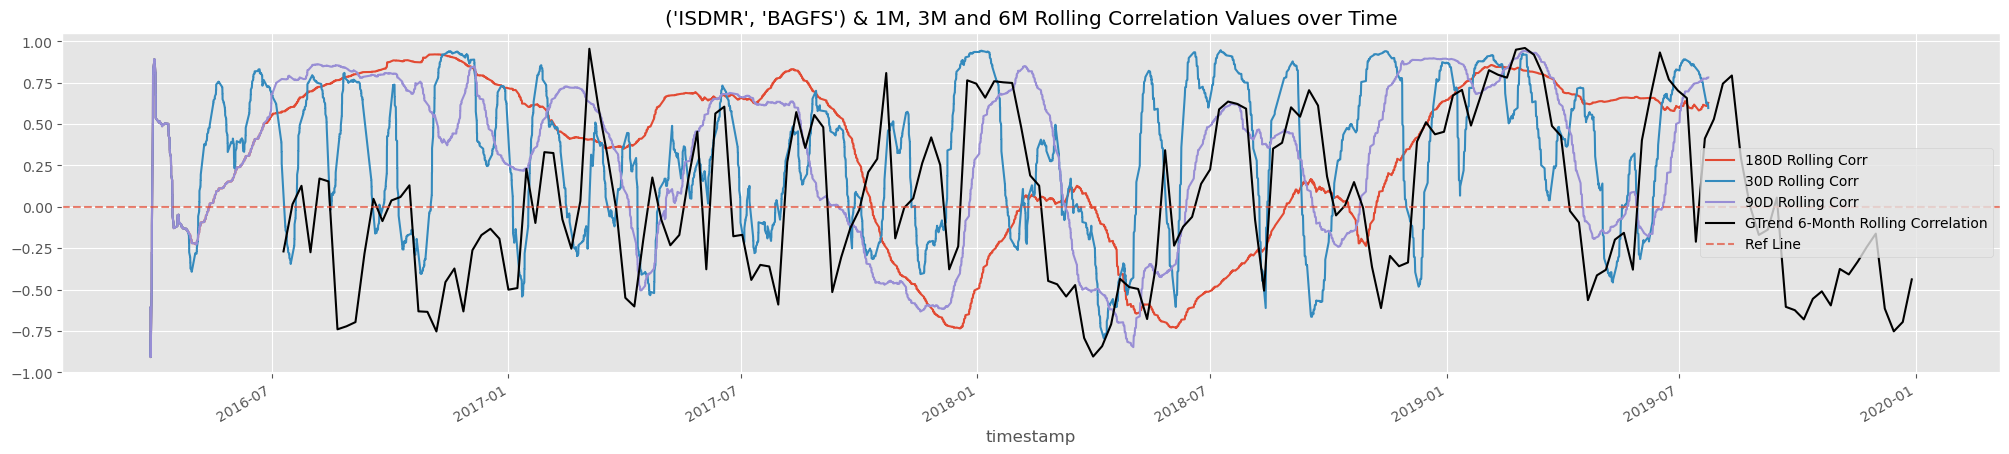

In [23]:
gtrend_rolling_corr = get_gtrend_rolling_correlation(PAIR3)

rolling_corrs_pair3 = calculate_rolling_corrs(
    data_pivot, PAIR3, PERIOD_SPACE 
)
ax = rolling_corrs_pair3.plot(x="timestamp", figsize=(25, 5))
ax.plot(gtrend_rolling_corr.date, gtrend_rolling_corr.gtrend_val, color="black", label="GTrend 6-Month Rolling Correlation")
ax.axhline(0, label="Ref Line", ls="--", alpha=0.69)
ax.set_title(f"{PAIR3} & 1M, 3M and 6M Rolling Correlation Values over Time")
ax.legend()
plt.show()

Although rolling correlation of stock pair trends are generally similar, their values vary most often. The reason why this situation occurs may be "search volume and financial market dynamics completely different from each other."

#### Conclusion

We attempted to thoroughly analyze 60 Borsa Istanbul stocks and their closing prices from nearly 2012 to 2019 for this assignment. We mainly focused on descriptive analysis, moving correlation analysis with selected pairs of stocks, and then dimensionality reduction (PCA). Finally, using the information about relationship between selected pairs of stocks we gathered from Google Trend, we attempted to draw a conclusion.